In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pylab as plt

from pathlib import Path
from PIL import Image

In [2]:
root_dir = Path("../")
data_dir = root_dir / "data"
logs_dir = root_dir / "reports"
images_dir = data_dir / "images"
train_csv = data_dir / "train_val_dataset.csv"
test_csv = data_dir / "test_dataset.csv"

In [3]:
train = pd.read_csv(train_csv)

In [4]:
train.head()

,Image Index,Finding Label,target
0,00000001_000.png,Cardiomegaly,1
1,00000001_001.png,Cardiomegaly|Emphysema,1
2,00000001_002.png,Cardiomegaly|Effusion,1
3,00000002_000.png,No Finding,0
4,00000004_000.png,Mass|Nodule,1


In [5]:
print('Распределение целевой переменной')
print(train.target.value_counts())

Распределение целевой переменной
target
1    3868
0    3693
Name: count, dtype: int64


In [6]:
def display_png_image(file_name, class_name=None):
    """Отображает PNG снимок"""
    try:
        # Открываем PNG изображение
        image = Image.open(images_dir / file_name)
        
        # Конвертируем в numpy array
        image_array = np.array(image)
        
        print(f"Размер изображения: {image_array.shape}")
        print(f"Тип данных: {image_array.dtype}")
        
        # Отображаем изображение
        plt.figure(figsize=(6, 6))
        
        # Выбираем правильную цветовую карту в зависимости от типа изображения
        if len(image_array.shape) == 2:
            # Градации серого
            plt.imshow(image_array, cmap='gray')
        elif len(image_array.shape) == 3:
            # Цветное изображение
            plt.imshow(image_array)
        else:
            plt.imshow(image_array)
        
        title = f"Класс: {class_name}" if class_name else "Изображение"
        plt.title(f"{title} ({file_name})")
        plt.axis('off')
        plt.show()
        
    except Exception as e:
        print(f"Ошибка при обработке файла {file_path}: {str(e)}")

Размер изображения: (1024, 1024)
Тип данных: uint8


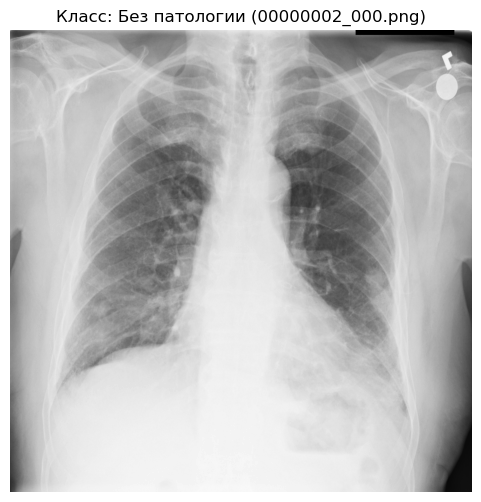

In [7]:
display_png_image(train['Image Index'][train['target'] == 0].iloc[0], 'Без патологии')

Размер изображения: (1024, 1024)
Тип данных: uint8


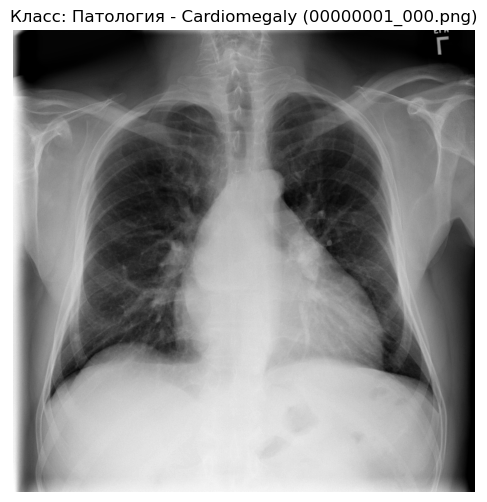

In [8]:
file_name = train['Image Index'][train['target'] == 1].iloc[0]
pathology = train['Finding Label'][train['target'] == 1].iloc[0]
display_png_image(file_name, f'Патология - {pathology}')